<a href="https://colab.research.google.com/github/vatsmanu728/National-e-Governance-Division/blob/main/EDA_on_dataset_of_UMAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('umang_reviews_automated.csv')

In [ ]:
print("--- First 20 Rows ---")
print(df.head(20))

--- First 20 Rows ---
                                reviewId       userName  \
0   90537cfb-a430-4f73-832c-b5e7a047f9f5  A Google user   
1   57ec76c6-cf80-4d4a-a67d-4fab91435d51  A Google user   
2   4eb0a1a6-83ae-4243-b0c7-b509ad3714f1  A Google user   
3   ef7a20dd-c3be-4251-9401-8655f3660eca  A Google user   
4   4362a7b3-38e1-4d1d-8a69-3d2fb3a06057  A Google user   
5   df65025d-506a-4bbb-8ea6-3e1214ada3c1  A Google user   
6   2a611cb5-831d-4fa3-99f5-c6d2d779363d  A Google user   
7   199b4605-9b50-42cb-946b-0562ab9b23ce  A Google user   
8   78a6526b-379c-42ea-a4d0-cb58ce1e4879  A Google user   
9   febbbdd9-3b47-4176-9f91-72f2a2f4db72  A Google user   
10  dfed1958-0321-47b4-a543-b9dd26c6a05f  A Google user   
11  885fbbf1-2e51-4007-9240-980b2fd784ee  A Google user   
12  3a412599-5437-48f0-aa34-dfd6ab733cb6  A Google user   
13  898bc88c-619c-4916-b20d-3afda086b09d  A Google user   
14  f00062ae-562c-4c41-9b74-c0e3fbfc8a18  A Google user   
15  0d389ecc-371d-4a23-8c9e-8ae653

In [ ]:
print("\n--- Data Info ---")
df.fillna(" ").replace([None], ["No comments"]).info() ##focus point


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102069 entries, 0 to 102068
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              102069 non-null  object
 1   userName              102069 non-null  object
 2   userImage             102069 non-null  object
 3   content               102069 non-null  object
 4   score                 102069 non-null  int64 
 5   thumbsUpCount         102069 non-null  int64 
 6   reviewCreatedVersion  102069 non-null  object
 7   at                    102069 non-null  object
 8   replyContent          102069 non-null  object
 9   repliedAt             102069 non-null  object
 10  appVersion            102069 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.6+ MB


In [ ]:
df.to_csv('umang_reviews_automated_cleaned.csv', index=True)

In [ ]:
print("\n--- Descriptive Statistics for 'score' ---")
print(df['score'].describe())


--- Descriptive Statistics for 'score' ---
count    102069.000000
mean          3.764346
std           1.680199
min           1.000000
25%           2.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: score, dtype: float64


/tmp/ipython-input-86-736982383.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


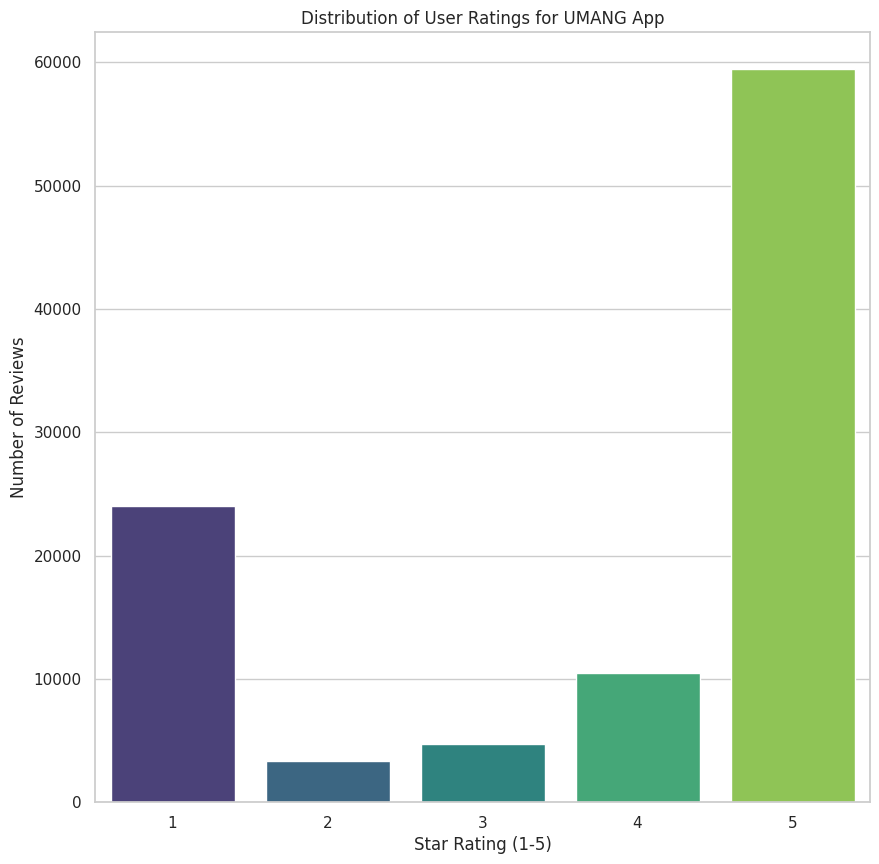

In [ ]:
# Set a style for our plots
sns.set(style="whitegrid")

# Create a count plot of the scores
plt.figure(figsize=(10, 10))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribution of User Ratings for UMANG App')
plt.xlabel('Star Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Reset the index to make 'at' a regular column
df.reset_index(inplace=True)


In [ ]:
# Drop rows where 'at' is NaT (which were invalid date formats)
df.dropna(subset=['at'], inplace=True)

# Set the 'at' column as the index for time-series analysis
df.set_index('at', inplace=True)

# Explicitly convert the index to DatetimeIndex
df.index = pd.to_datetime(df.index)

KeyError: ['at']

In [ ]:
# Resample the data by day and count the number of reviews
daily_reviews = df['score'].resample('D').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# Resample the data by day and calculate the average score
daily_avg_score = df['score'].resample('D').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

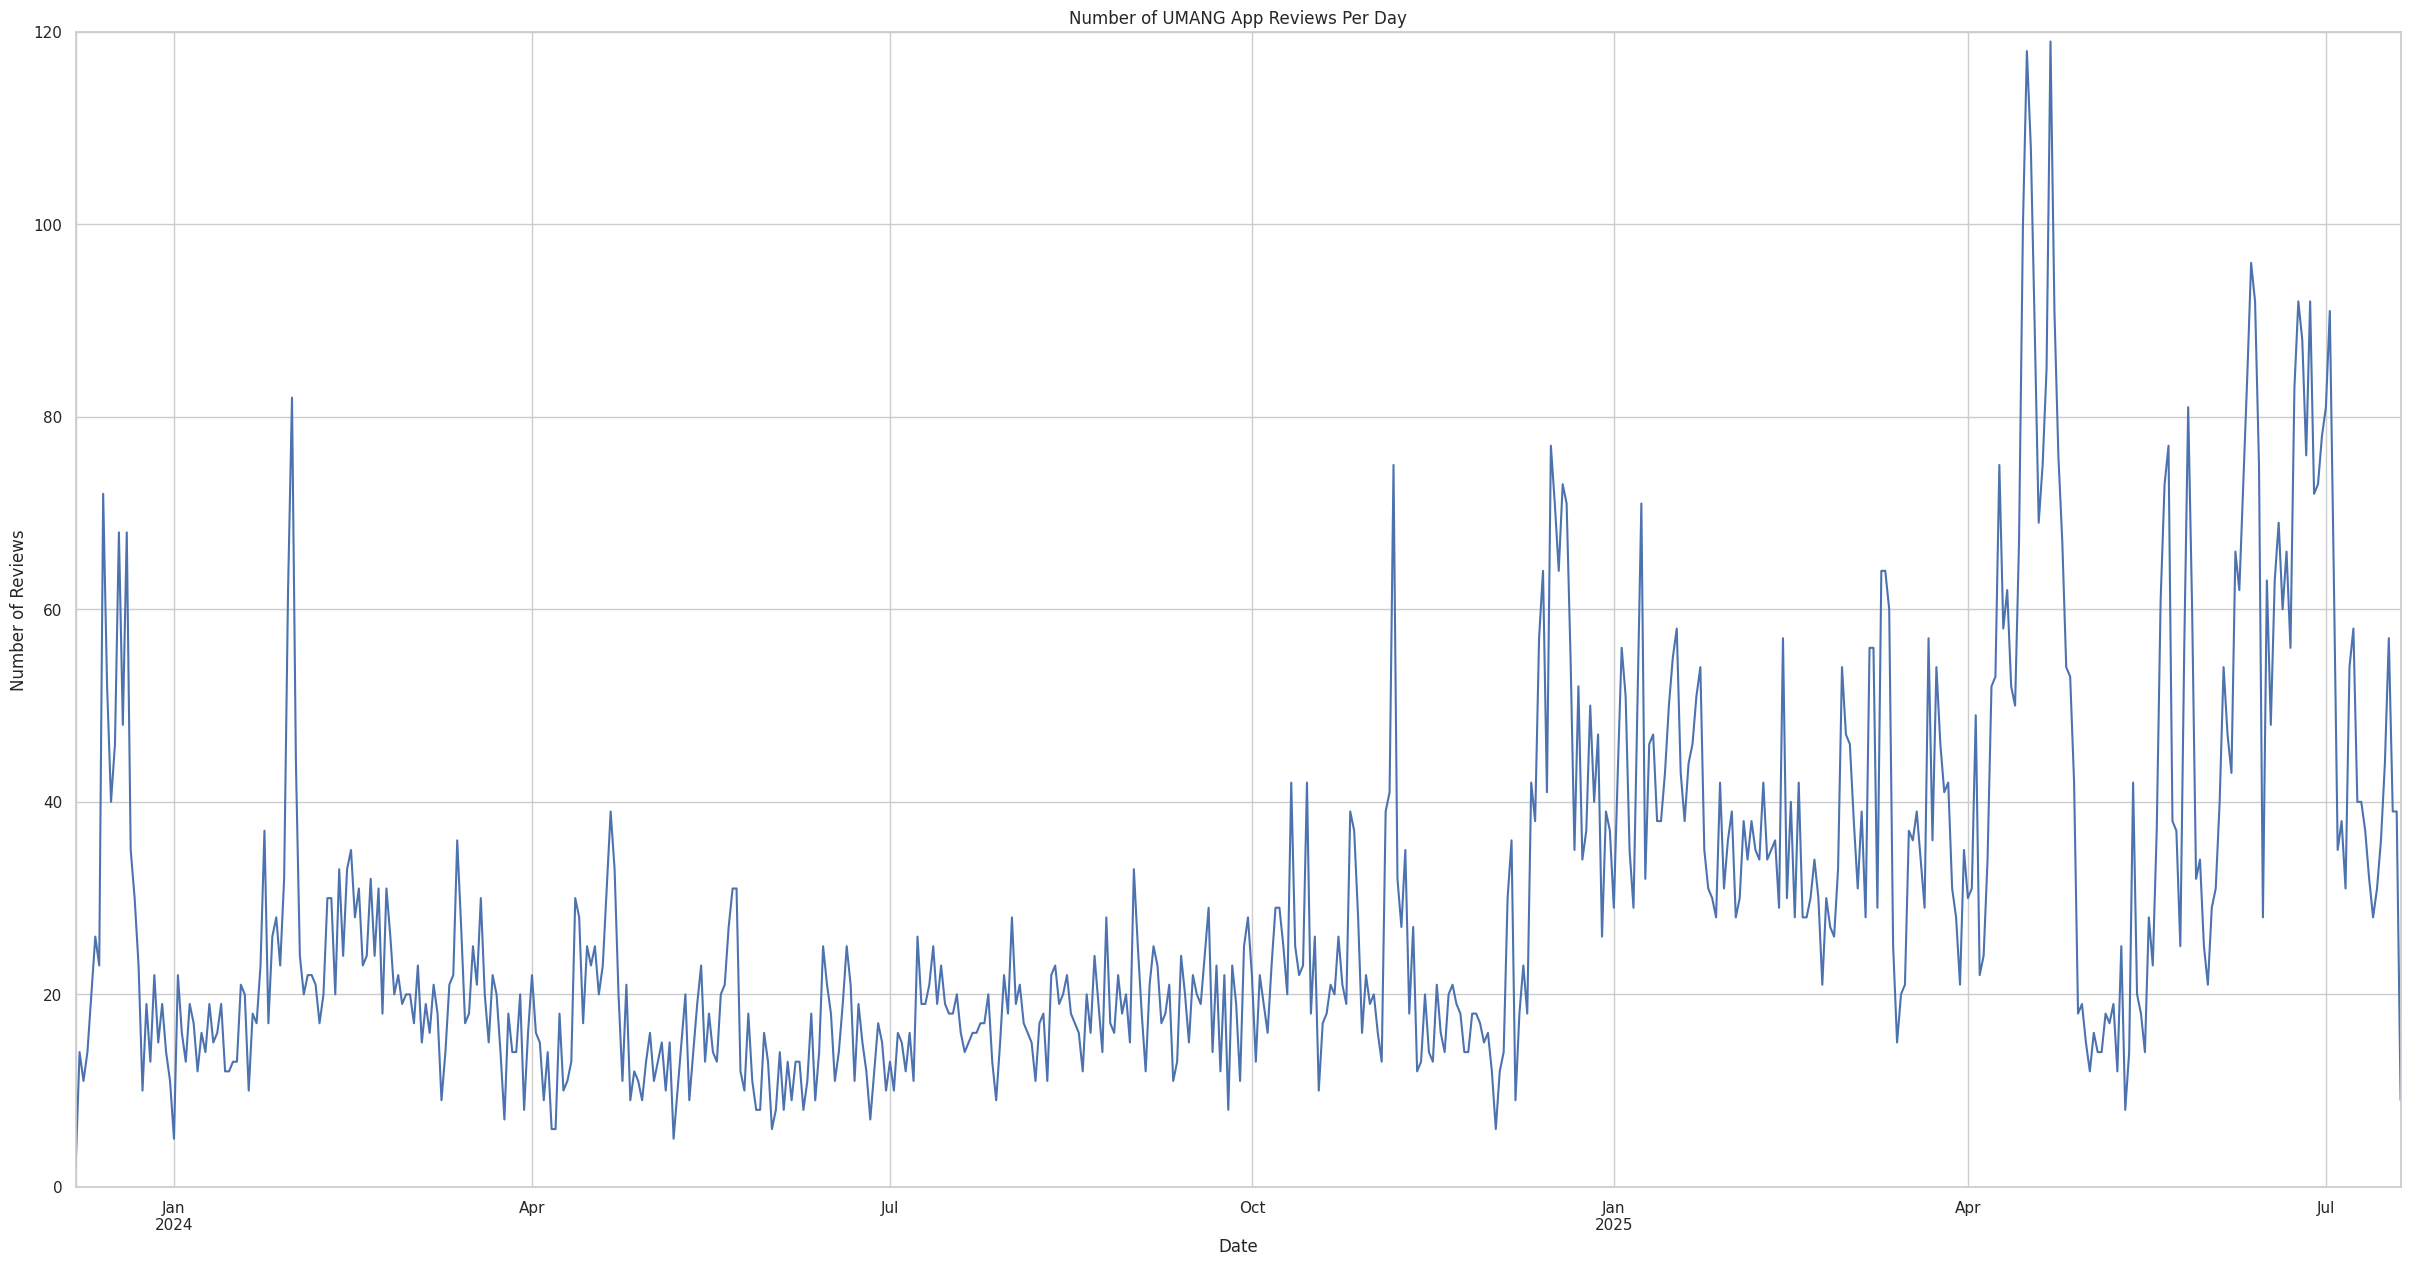

In [ ]:
# Plot the number of reviews over time
plt.figure(figsize=(30, 15))
daily_reviews.plot()
plt.title('Number of UMANG App Reviews Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.ylim(0, 120) # Set y-axis limits for better comparison
plt.show()

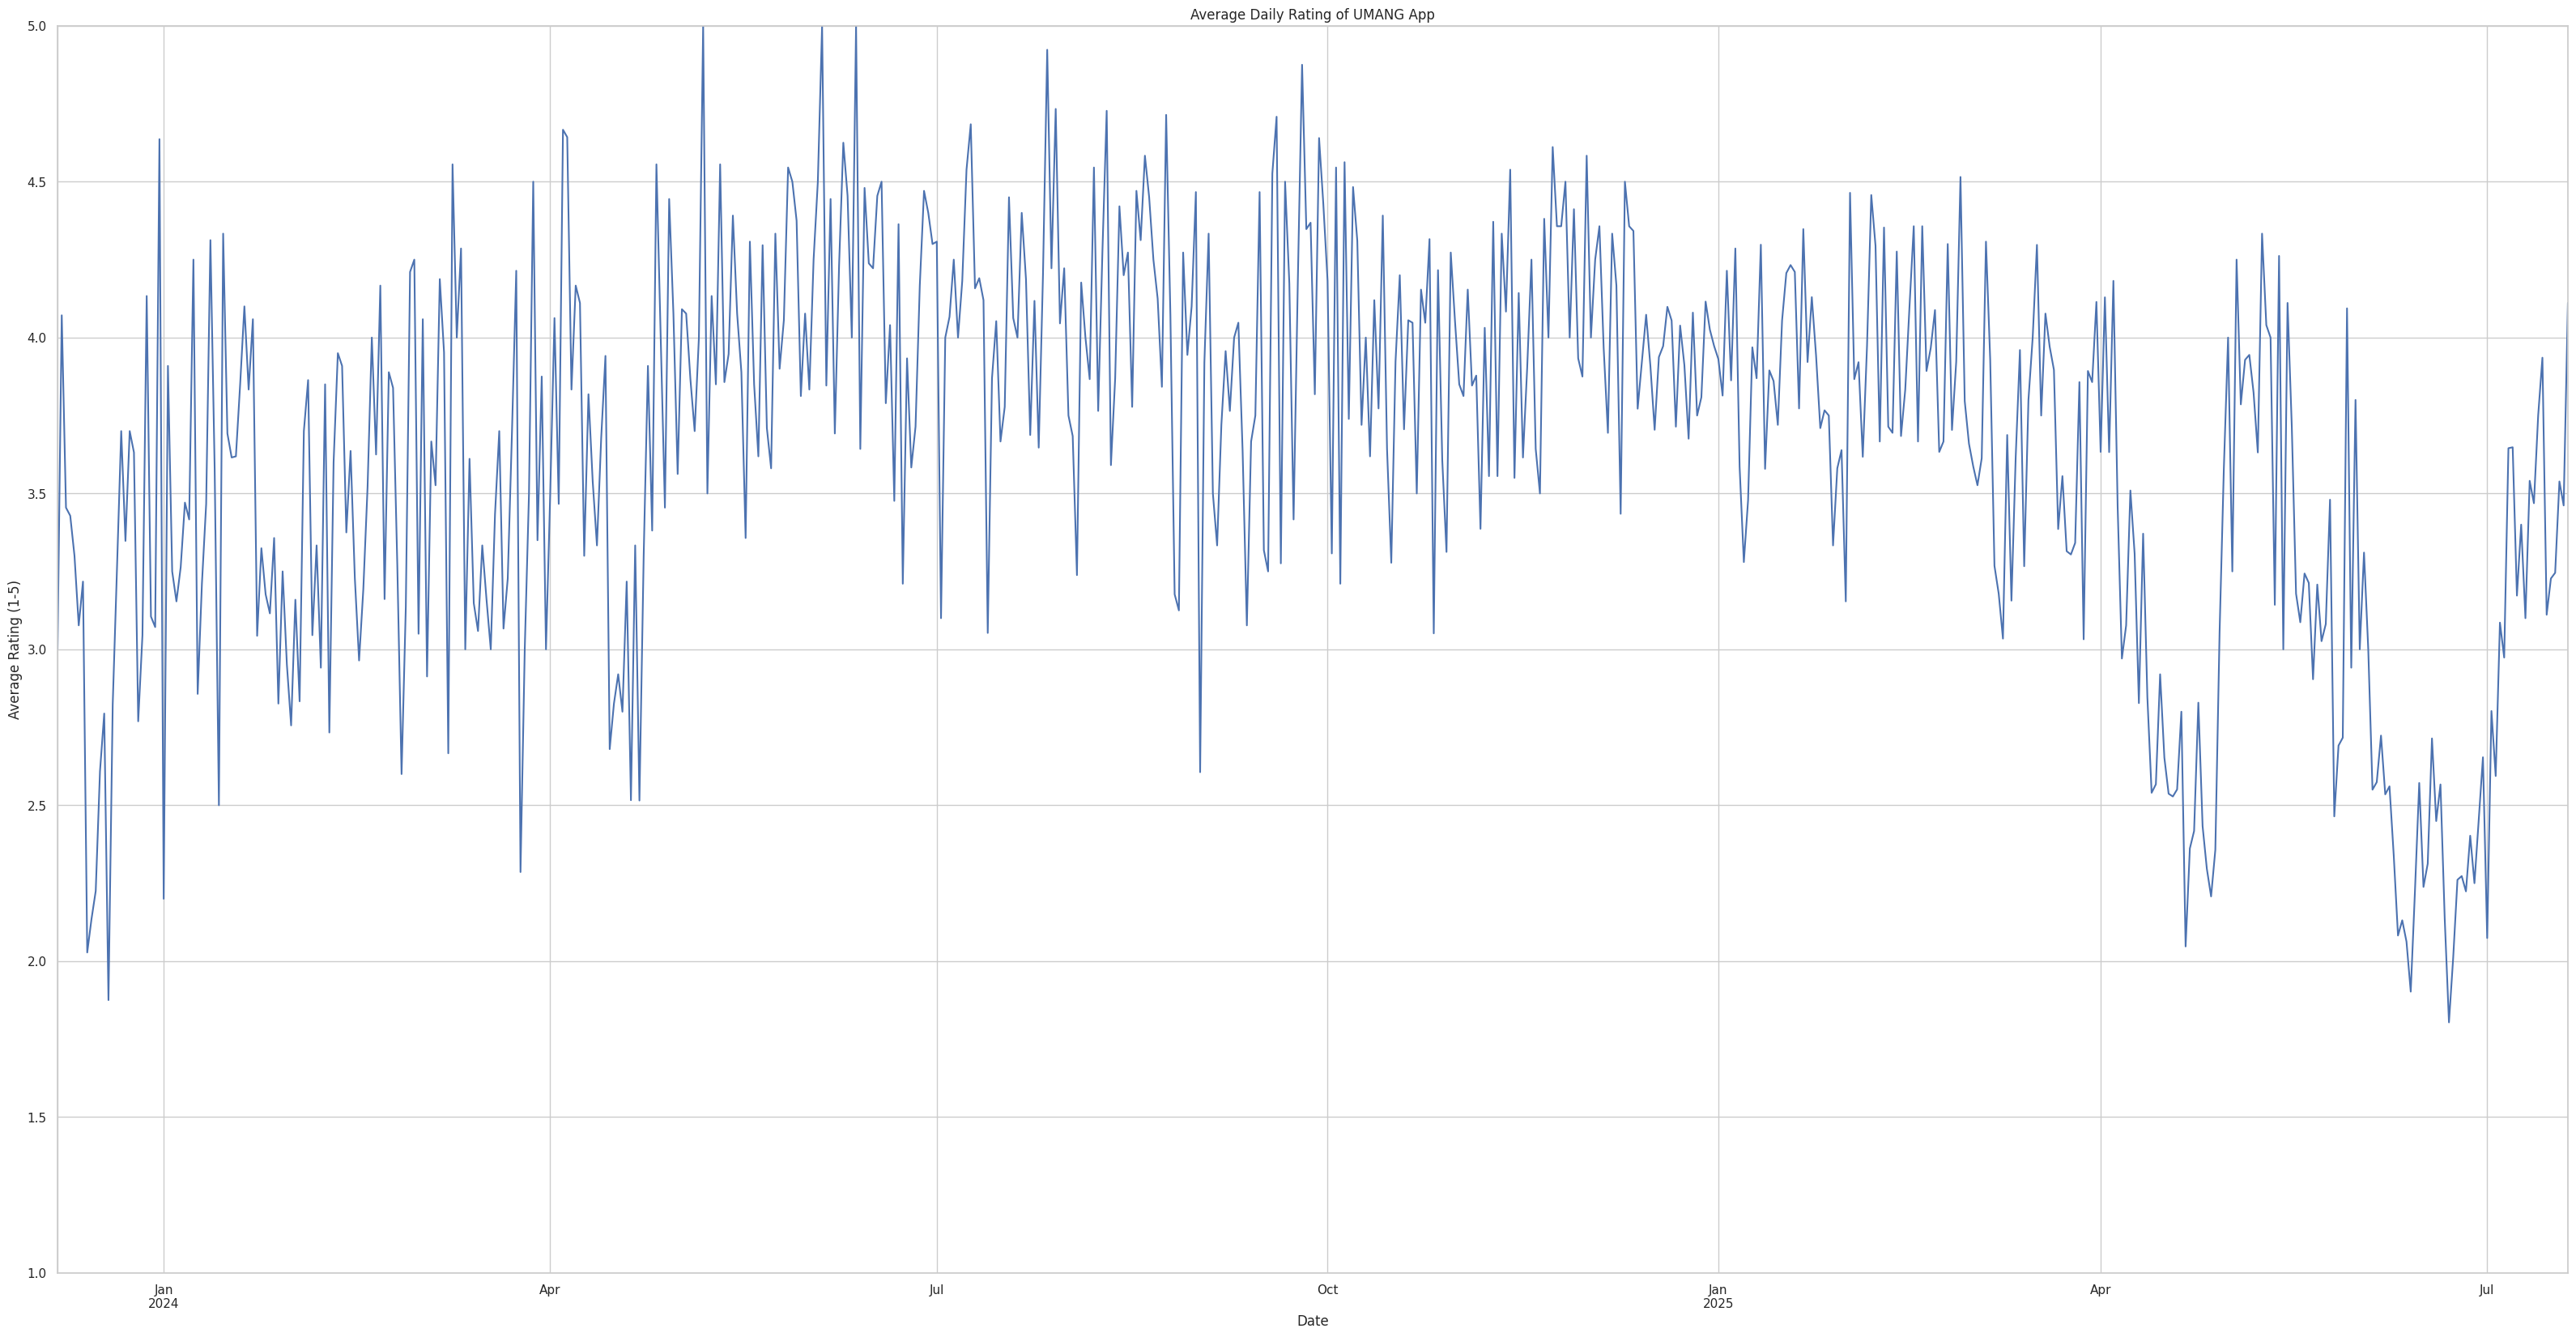

In [ ]:
# Plot the average score over time
plt.figure(figsize=(40, 20))
daily_avg_score.plot()
plt.title('Average Daily Rating of UMANG App')
plt.xlabel('Date')
plt.ylabel('Average Rating (1-5)')
plt.ylim(1, 5) # Set y-axis limits for better comparison
plt.show()

In [ ]:
from wordcloud import WordCloud
import re

In [ ]:
# We use .copy() to ensure we are working with a new dataframe
positive_reviews_df = df[df['score'] >= 4].copy()

In [ ]:
# Combine all positive review text into one large string
# We also handle any potential empty reviews with .dropna()
# Removing generic words that don't add much meaning
text = " ".join(review for review in positive_reviews_df['content'].dropna())
text = re.sub(r'\b(app|umang|hai|se|ko|ke|service|services|application)\b', '', text, flags=re.IGNORECASE)

In [ ]:
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='Blues'  # This is the key change to get blue colors
).generate(text)


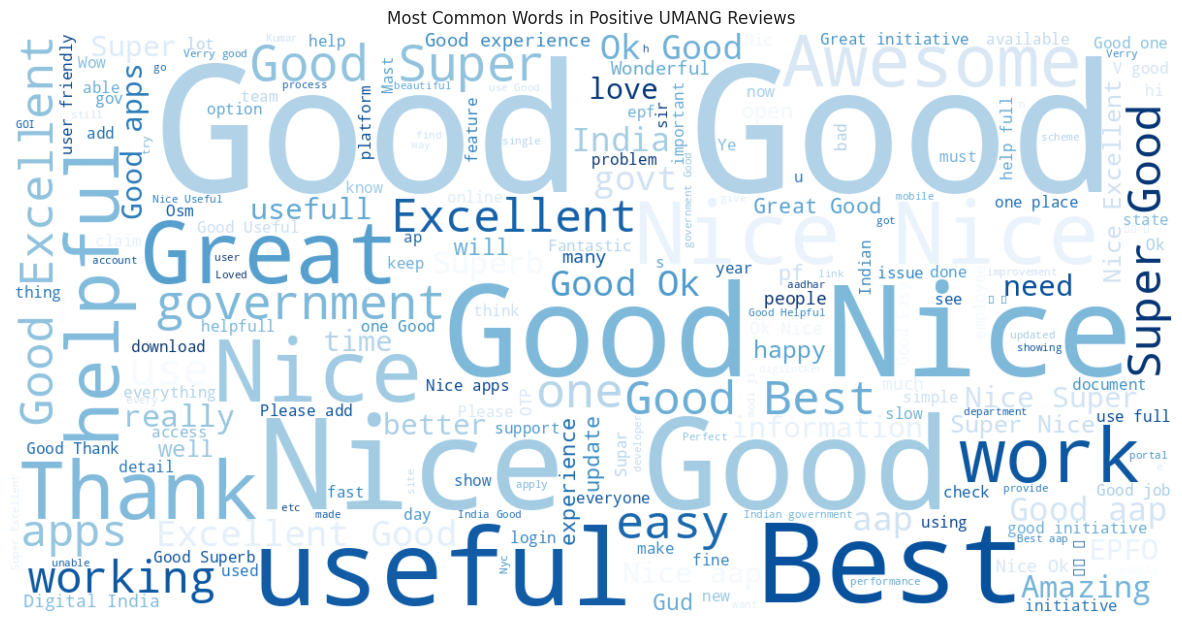

In [ ]:
# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Positive UMANG Reviews')
plt.show()

In [ ]:
# Filter for only negative reviews (1 and 2 stars)
negative_reviews_df = df[df['score'] <= 2]

In [ ]:
# Combine all negative review text into one large string
# Also, remove common but unhelpful words like 'app', 'Umang', 'use', 'service'
text = " ".join(review for review in negative_reviews_df['content'].dropna())
text = re.sub(r'\b(app|umang|use|service|services|please)\b', '', text, flags=re.IGNORECASE)

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='Reds'
).generate(text)

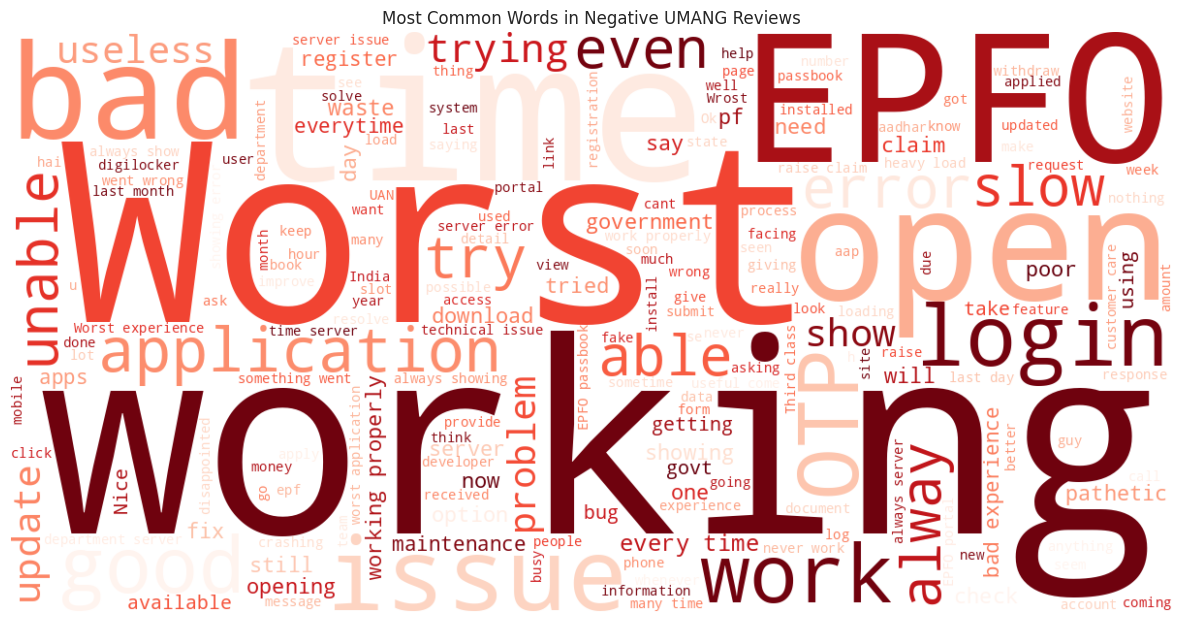

In [ ]:
# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Negative UMANG Reviews')
plt.show()

### Analyze the distribution of `thumbsUpCount`
Let's look at the distribution of the `thumbsUpCount` column.

### Analyze `reviewCreatedVersion` and `appVersion`
Let's examine the distribution of `reviewCreatedVersion` and `appVersion` and see if there are any noticeable patterns related to review scores.


--- Value Counts for reviewCreatedVersion ---
reviewCreatedVersion
2.0.26    7513
2.0.30    3276
1.2.7     2583
2.0.19    2544
1.2.8     2161
Name: count, dtype: int64

--- Value Counts for appVersion ---
appVersion
2.0.26    7513
2.0.30    3276
1.2.7     2583
2.0.19    2544
1.2.8     2161
Name: count, dtype: int64

--- Average Score by App Version (Top 10) ---
appVersion
2.0.89    5.000000
1.1.0     4.888889
1.1.1     4.458716
1.1.7     4.352941
1.2.4     4.331210
2.0.99    4.304348
1.2.7     4.245838
1.2.5     4.213775
1.2.3     4.194444
1.1.2     4.181416
Name: score, dtype: float64


/tmp/ipython-input-107-1196383785.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='appVersion', data=df_reset, order=df_reset['appVersion'].value_counts().iloc[:10].index, palette='viridis')


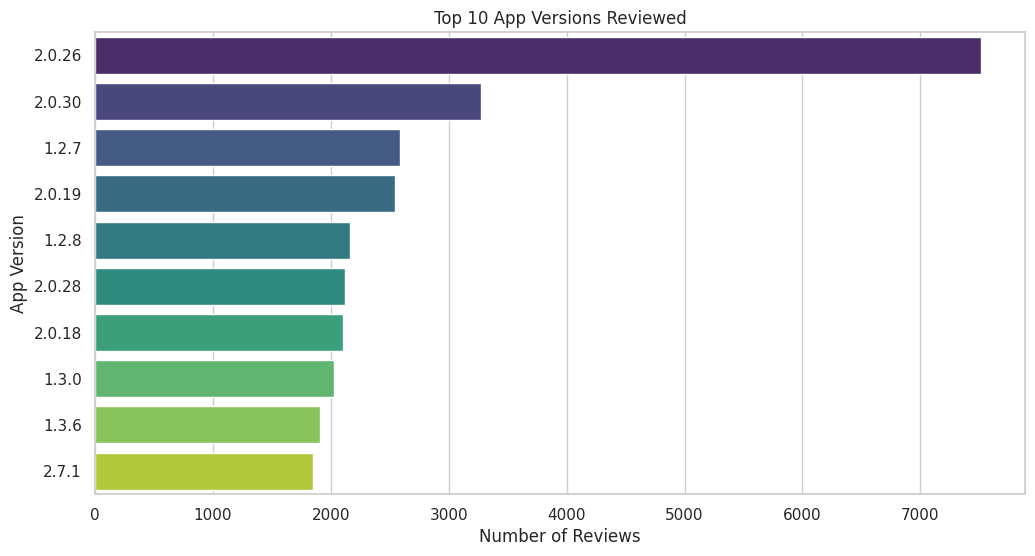

In [ ]:
print("\n--- Value Counts for reviewCreatedVersion ---")
print(df['reviewCreatedVersion'].value_counts().head())

print("\n--- Value Counts for appVersion ---")
print(df['appVersion'].value_counts().head())

# We can also look at the average score per app version (for top versions)
avg_score_by_version = df.groupby('appVersion')['score'].mean().sort_values(ascending=False)
print("\n--- Average Score by App Version (Top 10) ---")
print(avg_score_by_version.head(10))

# Plotting the distribution of top app versions
# Reset index for plotting as the index might have duplicates
df_reset = df.reset_index()
plt.figure(figsize=(12, 6))
sns.countplot(y='appVersion', data=df_reset, order=df_reset['appVersion'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 App Versions Reviewed')
plt.xlabel('Number of Reviews')
plt.ylabel('App Version')
plt.show()

### Analyze Reply Content and Response Rate
Let's analyze the `replyContent` and `repliedAt` columns to understand the app's engagement with user reviews.


--- Reply Rate ---
Number of reviews with a reply: 75760
Total number of reviews: 102069
Reply rate: 74.22%

--- Example Reply Content (first 5) ---
["Dear Karanveer, We are extremely sorry for the inconvenience. We are constantly trying to improve UMANG services and users' experience. We request you to share the issue faced by you, so we can check and improve the same. Please email us error details at customercare@umang.gov.in or call us at 10505. We will be happy to help you!\n", 'Dear Rahul, Inconvenience caused is deeply regretted. EPFO services were interrupted due to some technical issues with their servers. The issue is now fixed, and EPFO services are working now. We request you to try again & if you still face any issue, please email us at customercare@umang.gov.in or call us at 10505.', 'Dear Manish, We regret the inconvenience that you experienced. As we checked, UMANG app is working fine. It may be an intermittent issue and we request you to try again now. If you are still

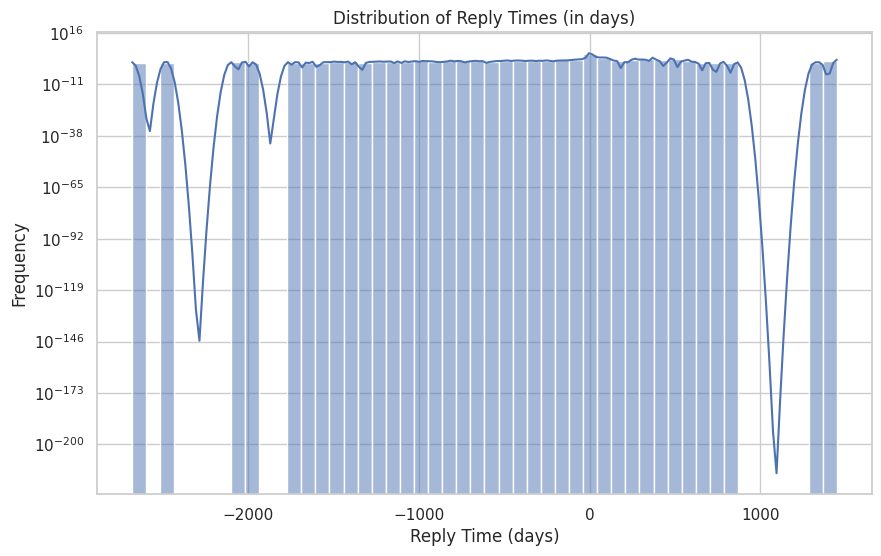

In [ ]:
# Check the number of reviews with a reply
replied_reviews_count = df['replyContent'].notna().sum()
total_reviews = len(df)
reply_rate = (replied_reviews_count / total_reviews) * 100

print(f"\n--- Reply Rate ---")
print(f"Number of reviews with a reply: {replied_reviews_count}")
print(f"Total number of reviews: {total_reviews}")
print(f"Reply rate: {reply_rate:.2f}%")

# Look at some examples of replies
print("\n--- Example Reply Content (first 5) ---")
# Filter out None and NaN values before converting to list
print(df['replyContent'].dropna().head().tolist())

# Analyze the time taken to reply (if replied)
# We need to convert 'repliedAt' to datetime objects and calculate the difference from 'at'
df['repliedAt'] = pd.to_datetime(df['repliedAt'])

# Calculate the time difference between review creation and reply
# Only for reviews that have been replied to
# Filter the DataFrame to include only rows where 'repliedAt' is not NaT before calculating reply_time
df_replied = df.dropna(subset=['repliedAt']).copy()

# Explicitly ensure the index is DatetimeIndex before subtraction
df_replied.index = pd.to_datetime(df_replied.index)

df_replied['reply_time'] = (df_replied['repliedAt'] - df_replied.index).dt.total_seconds() / (60*60*24) # in days

print("\n--- Descriptive Statistics for Reply Time (in days) ---")
print(df_replied['reply_time'].describe())

# Visualize the distribution of reply times
plt.figure(figsize=(10, 6))
sns.histplot(df_replied['reply_time'].dropna(), bins=50, kde=True)
plt.title('Distribution of Reply Times (in days)')
plt.xlabel('Reply Time (days)')
plt.ylabel('Frequency')
plt.yscale('log') # Use a log scale for frequency due to potential outliers
plt.show()

In [ ]:
print(df_replied[['repliedAt']].info())
print(df_replied['repliedAt'].apply(type).value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 75760 entries, 2025-07-19 06:28:24 to 2017-06-30 13:14:37
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   repliedAt  75760 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2+ MB
None
repliedAt
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    75760
Name: count, dtype: int64



--- Descriptive Statistics for 'thumbsUpCount' ---
count    102069.000000
mean          1.344796
std          37.977536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        6942.000000
Name: thumbsUpCount, dtype: float64


Text(0.5, 1.0, 'Distribution of Thumbs Up Count')

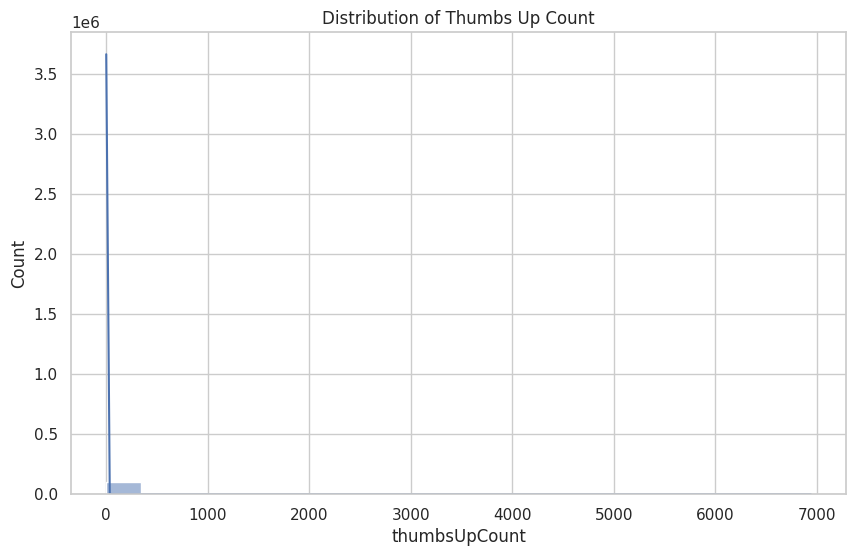

In [ ]:
print("\n--- Descriptive Statistics for 'thumbsUpCount' ---")
print(df['thumbsUpCount'].describe())

# Create a histogram for thumbsUpCount
plt.figure(figsize=(10, 6))
sns.histplot(df['thumbsUpCount'], bins=20, kde=True)
plt.title('Distribution of Thumbs Up Count')
